In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container {width:100% !important; }</style>"))

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2
import bnpm

import a single s2p output directory to test parameters on

In [4]:
dir_s2p = r'/media/rich/bigSSD/data_raw/BMI/mouse_0322R/example_s2p_output_for_tqm/20230419/plane0'

In [5]:
F, Fneu, iscell, ops, spks, stat = bnpm.ca2p_preprocessing.import_s2p(dir_s2p)

In [17]:
Fs = ops['fs']

In [13]:
dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": 30,
    "neuropil_fraction": 0.7,
    "rolling_percentile_window": 30*15*60,
}

In [14]:
dFoF , dF , F_neuSub , F_baseline_roll = bnpm.ca2p_preprocessing.make_dFoF(
    F,
    Fneu=Fneu,
    roll_centered=True,
    roll_stride=1,
    roll_interpolation='linear',
    multicore_pref=True,
    verbose=True,
    **dFoF_params,
)

100%|██████████████████████████████████████████████████████████████████████████████| 36/36 [00:28<00:00,  1.28it/s]


Calculated dFoF. Total elapsed time: 35.98 seconds


In [15]:
thresh = {
    'var_ratio__Fneu_over_F': (0, 0.5),
    'EV__F_by_Fneu': (0, 0.5),
    'base_FneuSub': (50, 2000),
    'base_F': (100, 5000),
    'nsr_autoregressive': (0, 10),
    'noise_derivMAD': (0, 0.025),
    'max_dFoF': (0.75, 40),
    'baseline_var': (0, 0.025),
}

ROIs excluded: 764 / 2413
ROIs included: 1649 / 2413


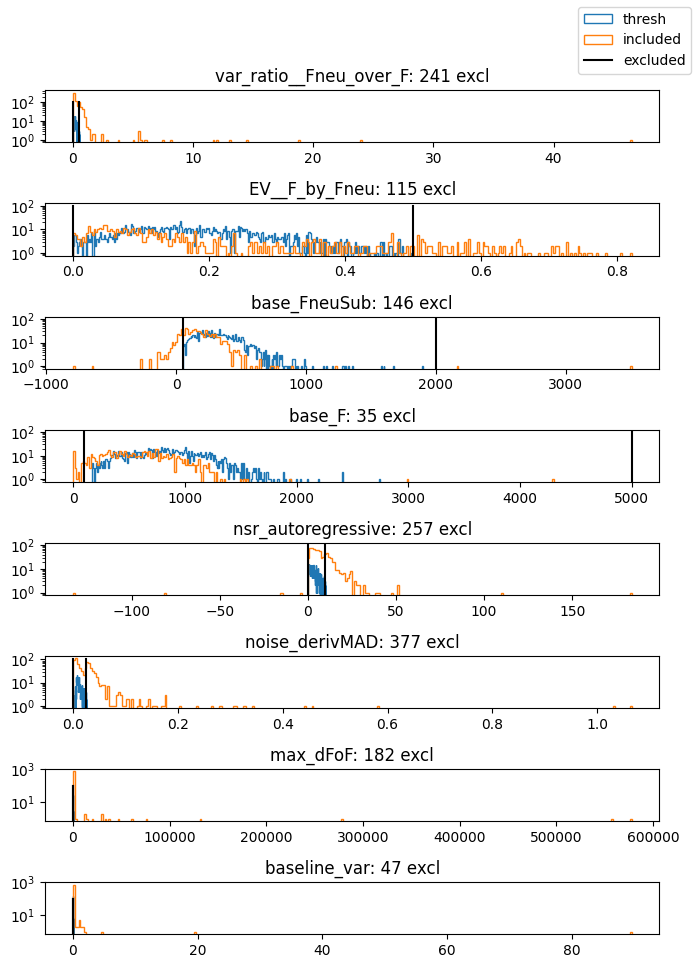

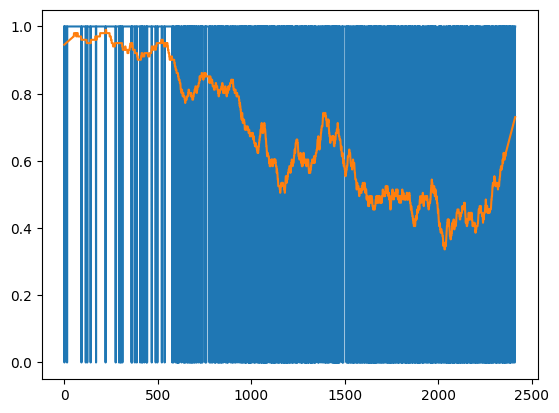

In [18]:
tqm, iscell_tqm = bnpm.ca2p_preprocessing.trace_quality_metrics(
    F=F,
    Fneu=Fneu,
    dFoF=dFoF,
    F_neuSub=F_neuSub,
    F_baseline_roll=F_baseline_roll,
    percentile_baseline=dFoF_params['percentile_baseline'],
    Fs=Fs,
    plot_pref=True,
    thresh=thresh,
    device='cpu',
)